In [145]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [146]:
import os 
pwd = os.getcwd()
filepath = os.path.join(pwd,"AEP_hourly.csv")
filepath

'c:\\Users\\ashis\\OneDrive\\Desktop\\Machine Learning\\time_series_1\\AEP_hourly.csv'

In [147]:
df = pd.read_csv(filepath)
print("="*50)
print("First Five Rows ", "\n")
print(df.head(5), "\n")
print(df.tail(5), "\n")
print("="* 50)
print("Information about Dataset", "\n")
print(df.info(), "\n")

print("=","\n")
print("Describe the Dataset", "\n")
print(df.describe(), "\n")

print("="*50)
print("Null Values", "\n")
print(df.isnull().sum(), "\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

                   Datetime   AEP_MW
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0 

Information about Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

= 

Describe the Dataset 

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     256

## Reformatting the Date Time columns

In [148]:
# Extract all the data like Year, Month, Day and time etc

dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.dayofweek
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Day
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,4


In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
 1   Month   121273 non-null  int32  
 2   Year    121273 non-null  int32  
 3   Date    121273 non-null  object 
 4   Time    121273 non-null  object 
 5   Day     121273 non-null  int32  
dtypes: float64(1), int32(3), object(2)
memory usage: 5.1+ MB


## Exploration

In [150]:
# Checking the numbe of unique year we have in the dataset 
print(df.Year.unique(), "\n")
print("Total number of unique years: ", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total number of unique years:  15 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy consumption over the years')

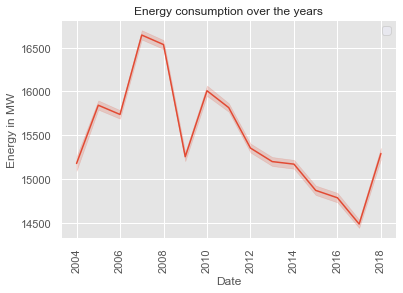

In [151]:
from matplotlib import style 

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')
sns.lineplot(x = dataset['Year'], y = dataset['AEP_MW'], data=df)
sns.set(rc = {'figure.figsize':(20,6)})

plt.title("Energy consumption over the years")
plt.xlabel("Date")
plt.ylabel('Energy in MW')
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.title("Energy consumption over the years")

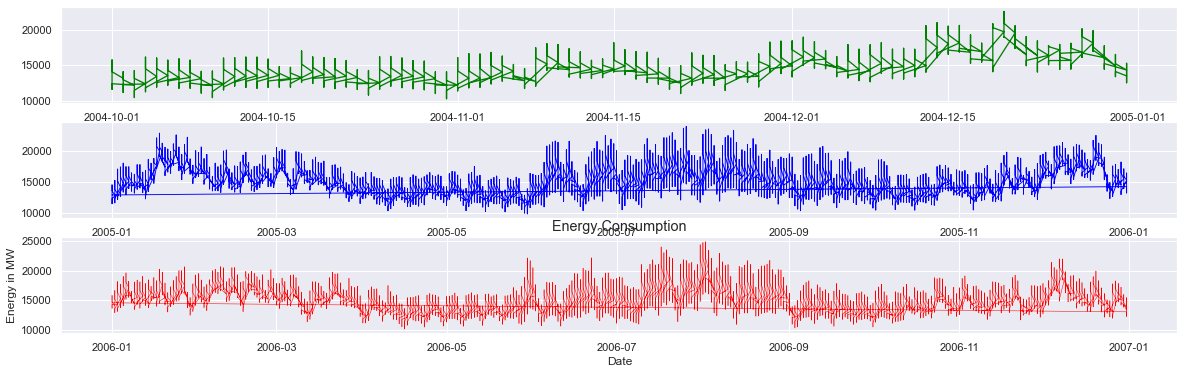

In [152]:
from matplotlib import style

fig  = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

style.use('ggplot')

y_2004 = dataset['AEP_MW']["2004"].to_list()
x_2004 = dataset['Date']["2004"].to_list()
ax1.plot(x_2004, y_2004, color ='green', linewidth = 1.3)

y_2005 = dataset['AEP_MW']['2005'].to_list()
x_2005 = dataset['Date']['2005'].to_list()
ax2.plot(x_2005, y_2005, color ='blue', linewidth = 0.9)

y_2006 = dataset['AEP_MW']['2006'].to_list()
x_2006 = dataset['Date']['2006'].to_list()
ax3.plot(x_2006, y_2006, color ='red', linewidth = 0.5)

plt.rcParams['figure.figsize'] = (25,15)
plt.title("Energy Consumption")
plt.xlabel('Date')
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)





#### Energy distribution

Text(0.5, 1.0, 'Energy Distribution')

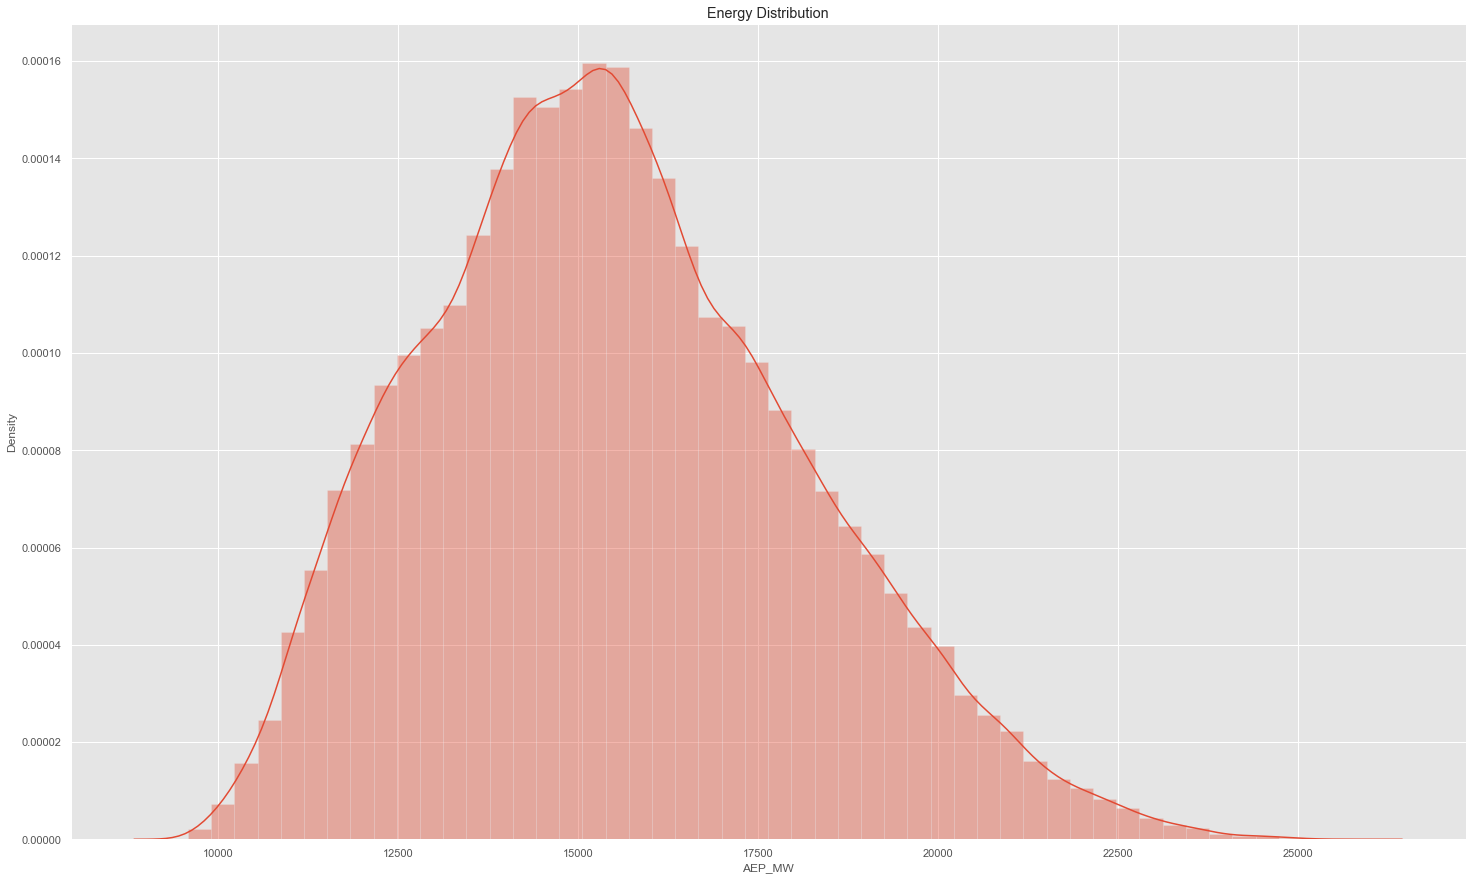

In [153]:
sns.distplot(dataset['AEP_MW'])
plt.title("Energy Distribution")

In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
 1   Month   121273 non-null  int32  
 2   Year    121273 non-null  int32  
 3   Date    121273 non-null  object 
 4   Time    121273 non-null  object 
 5   Day     121273 non-null  int32  
dtypes: float64(1), int32(3), object(2)
memory usage: 5.1+ MB


In [155]:
dataset['Time'] = pd.to_datetime(dataset['Time'], format="%H:%M:%S")
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


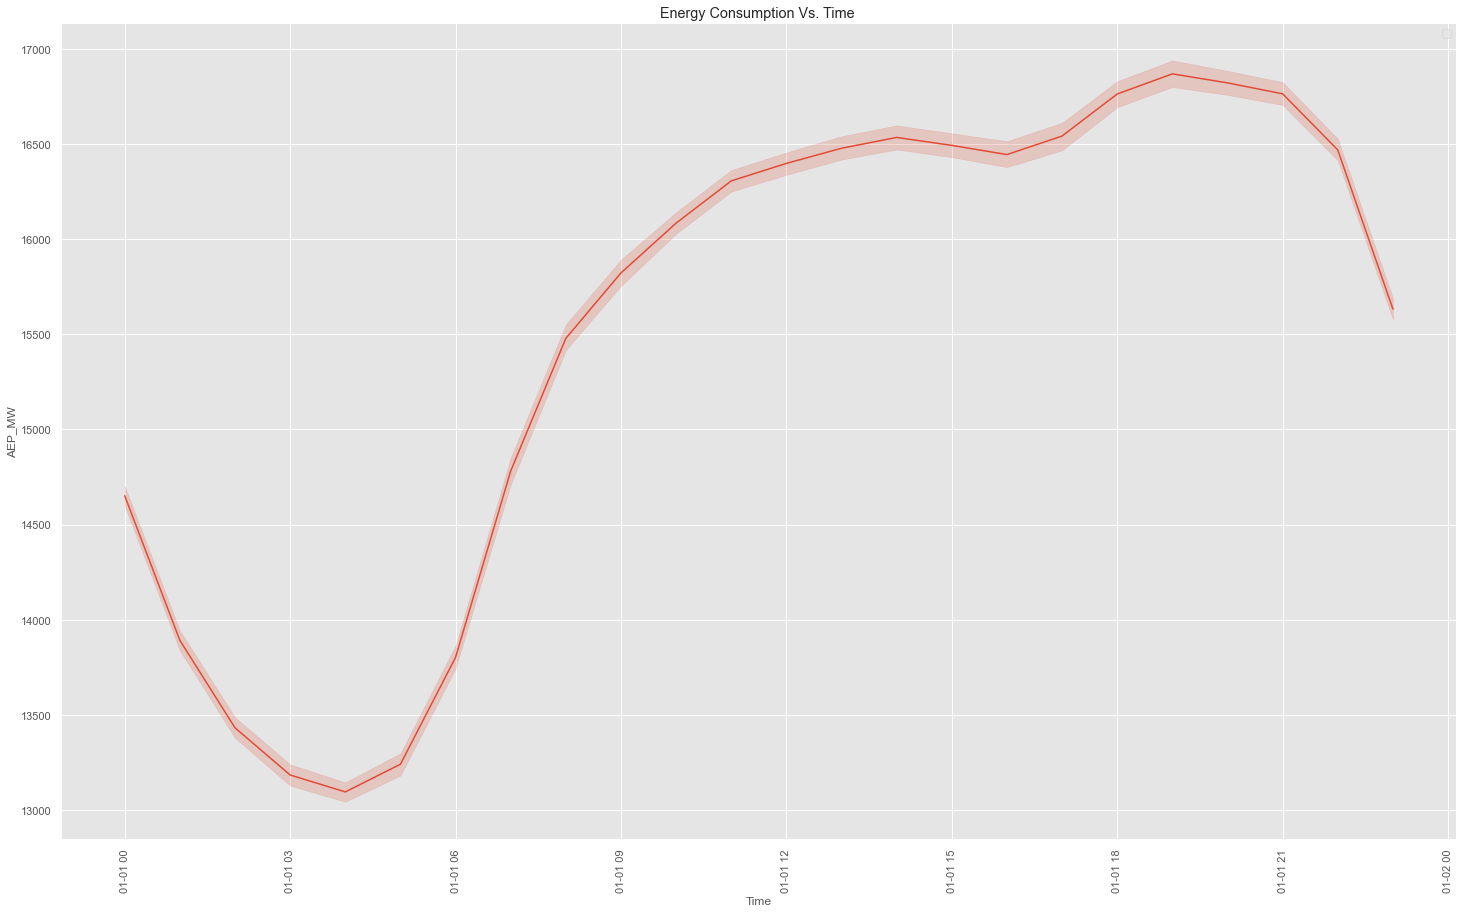

In [156]:
# Energy with respect to time 

fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.lineplot(x = dataset['Time'], y = dataset['AEP_MW'], data=df)
plt.title("Energy Consumption Vs. Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [157]:
new_dataset = dataset.resample('D').mean()

In [158]:
new_dataset.head(10)

,AEP_MW,Month,Year,Date,Time,Day
Datetime,,,,,,
2004-10-01,14284.521739,10.0,2004.0,2004-10-01,1900-01-01 12:00:00,4.0
2004-10-02,12999.875000,10.0,2004.0,2004-10-02,1900-01-01 11:30:00,5.0
2004-10-03,12227.083333,10.0,2004.0,2004-10-03,1900-01-01 11:30:00,6.0
2004-10-04,14309.041667,10.0,2004.0,2004-10-04,1900-01-01 11:30:00,0.0
2004-10-05,14439.708333,10.0,2004.0,2004-10-05,1900-01-01 11:30:00,1.0
2004-10-06,14424.791667,10.0,2004.0,2004-10-06,1900-01-01 11:30:00,2.0
2004-10-07,14449.416667,10.0,2004.0,2004-10-07,1900-01-01 11:30:00,3.0
2004-10-08,14350.333333,10.0,2004.0,2004-10-08,1900-01-01 11:30:00,4.0
2004-10-09,12934.541667,10.0,2004.0,2004-10-09,1900-01-01 11:30:00,5.0


In [159]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5055 entries, 2004-10-01 to 2018-08-03
Freq: D
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   AEP_MW  5055 non-null   float64       
 1   Month   5055 non-null   float64       
 2   Year    5055 non-null   float64       
 3   Date    5055 non-null   datetime64[ns]
 4   Time    5055 non-null   datetime64[ns]
 5   Day     5055 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 276.4 KB


In [160]:
print("Old Dataset: " , dataset.shape)
print("New Dataset: " , new_dataset.shape)


Old Dataset:  (121273, 6)
New Dataset:  (5055, 6)


### Splitting the Training and Test Dataset 

In [161]:
test_data = new_dataset.tail(100)
train_data = new_dataset.iloc[:,0:1]
train_data = train_data[:-60]

In [162]:
train_data

,AEP_MW
Datetime,
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333
...,...
2018-05-31,16741.083333
2018-06-01,15734.666667
2018-06-02,14212.166667


In [163]:
sc = MinMaxScaler(feature_range=(0,1))
Train = sc.fit_transform(train_data)

In [164]:
X_train = []
y_train = []


for i in range(60, Train.shape[0]):

    X_train.append(Train[i-60:i])

    y_train.append(Train[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(4935, 60, 1)
(4935, 1)


In [165]:
# Reshaping the dataset into 3-D vector 
X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(4935, 60, 1)

**Why add a new dimension?**

There are several reasons why you might want to add a new dimension of size 1:

1. **Compatibility with some machine learning models:** Certain deep learning models, especially those involving convolutional neural networks (CNNs), expect input data to have a specific number of dimensions. Adding a new dimension of size 1 can ensure compatibility with such models.
2. **Consistency with other data:** If you're working with multiple datasets that already have an extra dimension, adding one to X_train can make it consistent with the others.

### Modeling

In [167]:
from keras.models import Sequential

from keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dense, Dropout

In [168]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularization 
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer 
regressor.add(Dense(units=1))

# Compiling the RNN

regressor.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [169]:
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 27s 102ms/step - loss: 0.0373
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - loss: 0.0184
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - loss: 0.0178
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - loss: 0.0170
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - loss: 0.0153
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - loss: 0.0157
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - loss: 0.0149
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - loss: 0.0146
Epoch 9/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - loss: 0.0124
Epoch 10/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - loss: 0.0112
Epoch 11/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - loss: 0.0098
Epoch 12/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - loss: 0.0095
Epoch 13/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - loss: 0.0088
Epoch 14/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - loss: 0.0082
Epoch 15/50
155/155 ━━━

### Test Data

In [170]:
test_data.head(2)

,AEP_MW,Month,Year,Date,Time,Day
Datetime,,,,,,
2018-04-26,13157.791667,4.0,2018.0,2018-04-26,1900-01-01 11:30:00,3.0
2018-04-27,12964.000000,4.0,2018.0,2018-04-27,1900-01-01 11:30:00,4.0


In [171]:
print("Old test Dataset: " , test_data.shape)
print("New test Dataset: " , new_dataset.shape)

Old test Dataset:  (100, 6)
New test Dataset:  (5055, 6)


In [172]:
df_total = pd.concat((new_dataset[["AEP_MW"]], test_data[['AEP_MW']]),axis=0)

In [173]:
df_total.shape

(5155, 1)

In [174]:
inputs = df_total[len(df_total)-len(test_data)-60:].values
inputs.shape

(160, 1)

In [175]:
# We need to reshape the inpute the input variable 

inputs = inputs.reshape(-1,1)

# Normalise the dataset 
inputs = sc.transform(inputs)

X_test = []
for i in range(60,160):
    X_test.append(inputs[i-60:i])

# Convert into np array
X_test = np.array(X_test)

# Reshape before passing to Network 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

# Pass it to model
predicted_energy = regressor.predict(X_test)

# Doing the inverse transform to get the values 

predicted_energy = sc.inverse_transform(predicted_energy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step


In [176]:
true_energy = test_data['AEP_MW'].to_list()
predicted_energy = predicted_energy
dates = test_data.index.to_list()

In [178]:
new_df = pd.DataFrame(data = {'Date': dates, 'True Energy': true_energy, "predicted Energy":[x[0] for x in predicted_energy]})

In [179]:
new_df

,Date,True Energy,predicted Energy
0,2018-04-26,13157.791667,13710.369141
1,2018-04-27,12964.000000,13600.713867
2,2018-04-28,12237.583333,14501.105469
3,2018-04-29,12156.791667,13199.483398
4,2018-04-30,13443.500000,12849.320312
...,...,...,...
95,2018-07-30,15368.083333,15098.801758
96,2018-07-31,15180.291667,15822.460938
97,2018-08-01,15151.166667,14955.894531
98,2018-08-02,15687.666667,15286.253906


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


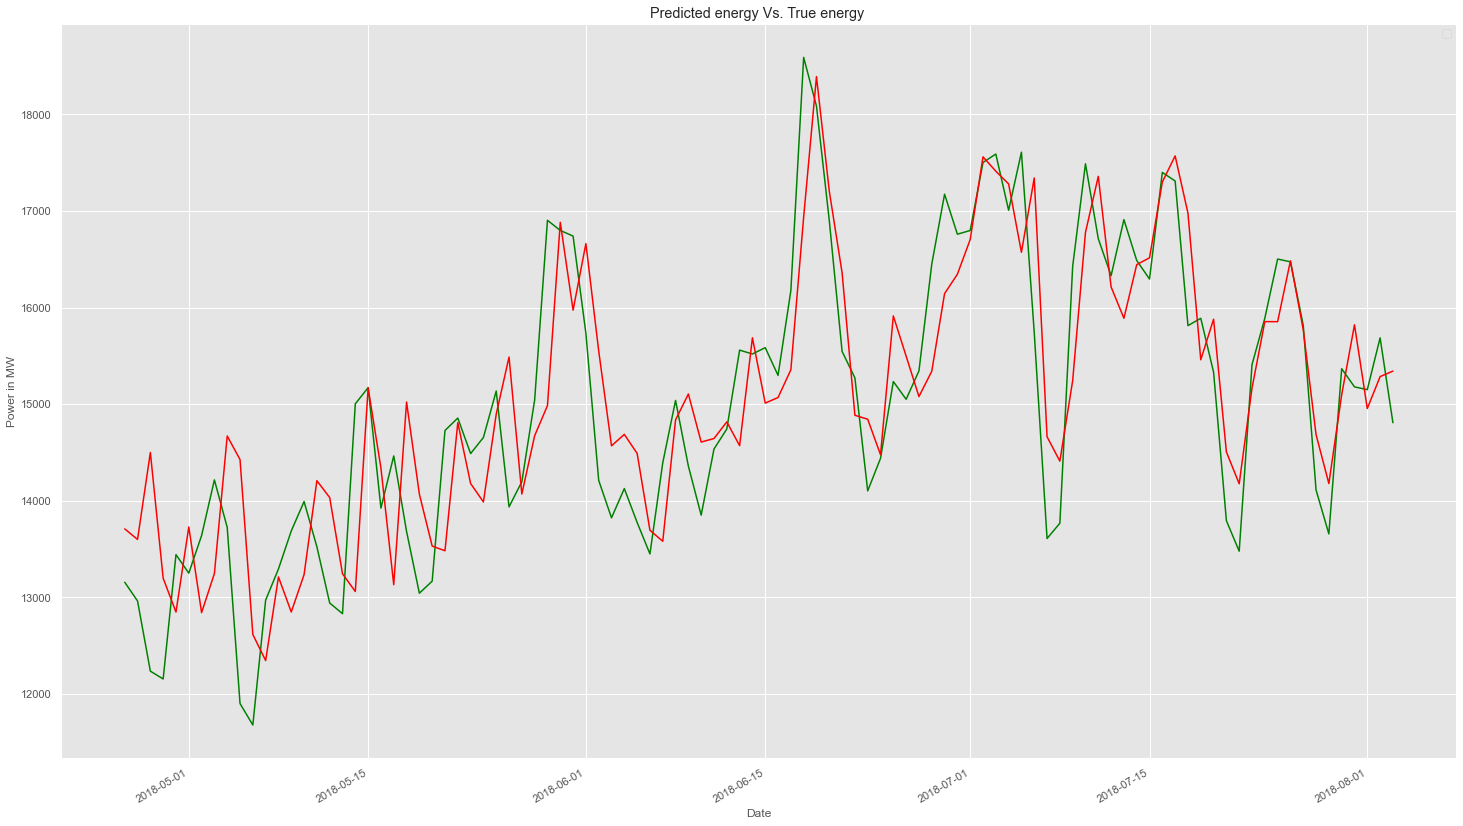

In [180]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = dates
y = true_energy

y1 = predicted_energy

plt.plot(x,y, color = 'green')
plt.plot(x,y1, color = 'red')

plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel("Power in MW")
plt.title("Predicted energy Vs. True energy ")
plt.legend()
